In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
RUTA_BD='BD'

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./scripts/Introduccion')
import utiles 

# Introducción A Machine learning

## Tabla de contenidos
1. <a href="#seccion1">Introduccion a Machine Learning</a>
  - <a href="#seccion2">Regresion</a>
  - <a href="#seccion3">Clasificacion</a>
  - <a href="#seccion4">Clustering</a>
  - <a href="#seccion5">Reduccion dimensional</a>  

<a id="seccion1"></a>
## Introduccion a Machine Learning
Machine Learning: Crear algoritmo capaces de identificar patrones complejos automaticamente.
<img src="imagenes/ml_map.png">

<a id="seccion2"></a>
### Regresiones
Uno de los usos mas importantes y extendidos en ML, nos permite hacer predicciones a partir de las relaciones entre las variables observadas.
* Predicciones de consumo energetico
* Esperanza de vida
<img src='imagenes/minimos_caudrados.png'>

In [3]:
import pandas as pd

house_price = pd.read_csv('BD/home_data.csv')
house_price.head(3)

,precio,aseos,dormitorios,superficie,plantas,codigo_postal
0,221900,3,1.00,1180,1.0,98178
1,538000,3,2.25,2570,2.0,98125
2,180000,2,1.00,770,1.0,98028


#### Entrenamiento

In [4]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

variables = ['superficie','dormitorios','plantas','aseos']
target    = ['precio']
house_price_zip98001=house_price.groupby(by='codigo_postal').get_group(98001)

clf.fit(house_price_zip98001[variables],house_price_zip98001[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Prediccion
Ya tenemos nuestro sistema entrenado, vamos a calcular una estima del precio de las casas que queremos

In [5]:
dato_a_consultar = pd.DataFrame(data={'superficie':[1800,1700,2000],'dormitorios':[2,3,3],'plantas':[2,3,2],'aseos':[3,3,3]},columns=variables)
clf.predict(dato_a_consultar)

array([[ 278439.7583145 ],
       [ 276367.21673345],
       [ 306700.44205499]])

<a id="seccion3"></a>
### Clasificacion
La meta es predecir una categoria a traves del las variables de entrada:
* Spam
* Clasificacion de imagenes
* Diagnosticos medicos
* Analisis de sentimiento

In [6]:
prestamos=pd.read_csv('BD/prestamos.csv')
prestamos.head(3)

,plazo,grado,sub_grado,propiedad_vivienda,proposito,prestamo_basura,num_anyos_trabajando
0,36 months,B,B2,RENT,credit_card,0,11
1,60 months,C,C4,RENT,car,1,1
2,36 months,C,C5,RENT,small_business,0,11


Vamos a inspeccionar cuantas clases tiene cada variable categorica

In [7]:
for columna in prestamos.columns.values:
    print (columna,pd.np.unique(prestamos[columna].values))

plazo [' 36 months' ' 60 months']
grado ['A' 'B' 'C' 'D' 'E' 'F' 'G']
sub_grado ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4' 'C5'
 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3' 'F4' 'F5'
 'G1' 'G2' 'G3' 'G4' 'G5']
propiedad_vivienda ['MORTGAGE' 'OTHER' 'OWN' 'RENT']
proposito ['car' 'credit_card' 'debt_consolidation' 'home_improvement' 'house'
 'major_purchase' 'medical' 'moving' 'other' 'small_business' 'vacation'
 'wedding']
prestamo_basura [0 1]
num_anyos_trabajando [ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Preprocesamiento de datos
1. Nuestro arbol de decision solamente entiende que cada variable categorica sea binaria, vamos a binarizar cada variable que tengamos
2. Para que el algorimo entienda que es clasificacion binaria, los grupos deben de ser [-1,1]

In [8]:
variables_categoricas=['plazo','grado','sub_grado','propiedad_vivienda','proposito']
prestamos_procesado=utiles.to_hot_encoding(prestamos,variables_categoricas)

prestamos_procesado.prestamo_basura=prestamos_procesado.prestamo_basura.apply(lambda x:1 if x else -1)
prestamos_procesado.head(2)

,prestamo_basura,num_anyos_trabajando,plazo_ 36 months,plazo_ 60 months,grado_A,grado_B,grado_C,grado_D,grado_E,grado_F,...,proposito_debt_consolidation,proposito_home_improvement,proposito_house,proposito_major_purchase,proposito_medical,proposito_moving,proposito_other,proposito_small_business,proposito_vacation,proposito_wedding
0,-1,11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Entrenamiento

In [9]:
from sklearn.tree import DecisionTreeClassifier

target='prestamo_basura'
features=prestamos_procesado.columns
features=features.drop(target)

decision_tree_model=DecisionTreeClassifier(max_depth=3,criterion='entropy')
decision_tree_model.fit(prestamos_procesado[features],prestamos_procesado[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

#### Visualizacion


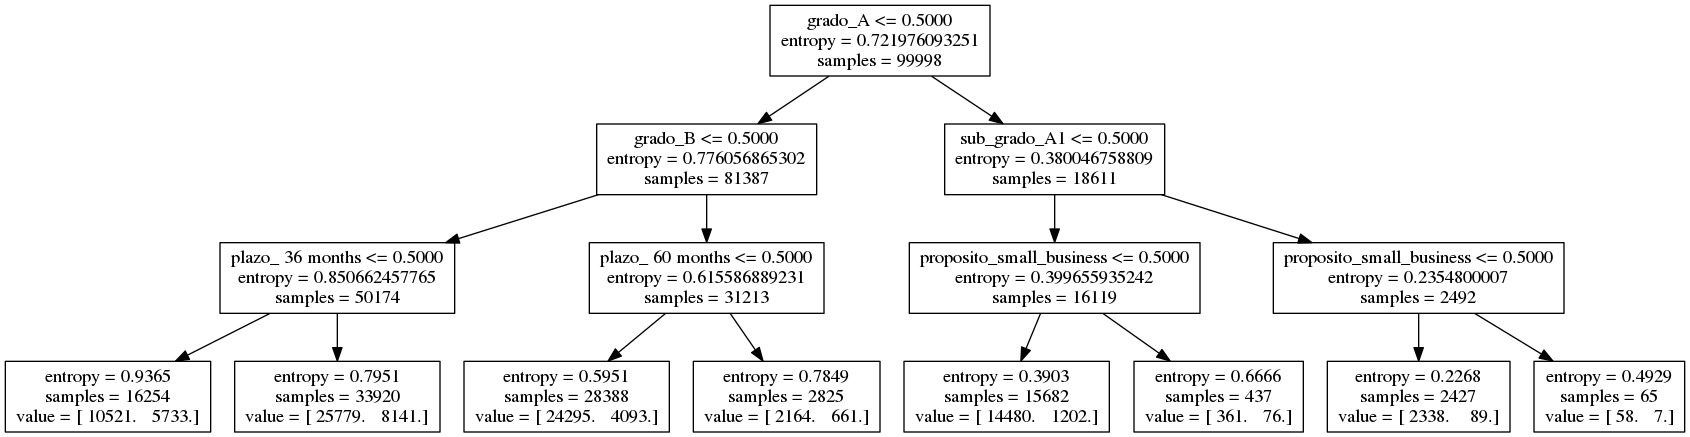

In [10]:
from sklearn import tree
import subprocess
from IPython.display import Image

archivo='small_model.dot'
imagen='tree.png'
tree.export_graphviz(decision_tree_model,archivo,feature_names = features)


subprocess.call(["dot","-Tpng",archivo, "-o", imagen])
Image(filename=imagen) 

#### Prediccion


In [11]:
prestamos.head(1)

,plazo,grado,sub_grado,propiedad_vivienda,proposito,prestamo_basura,num_anyos_trabajando
0,36 months,B,B2,RENT,credit_card,0,11


In [12]:
print ("Probalidad de ser rechazado para un prestamo: {}".format(24295/28288))

Probalidad de ser rechazado para un prestamo: 0.8588447398190046


In [13]:
decision_tree_model.predict_proba(prestamos_procesado[features].iloc[0])

array([[ 0.85581936,  0.14418064]])

<a id="seccion4"></a>
### Clustering
Si antes hemos realizado una clasificacion por medio de variables conociendo de antemano la solucion(sistemas supervisados). Los metodos de clustering nos ayudan a identificar grupos naturales sin categorizar o estructuras ocultas (sistemas sin supervisar)
- Grupos de paciencies similares
- Clasificacion de productos

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data[2,:]

array([  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
        16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.,   8.,  16.,
         0.,   0.,   0.,   0.,   1.,   6.,  15.,  11.,   0.,   0.,   0.,
         1.,   8.,  13.,  15.,   1.,   0.,   0.,   0.,   9.,  16.,  16.,
         5.,   0.,   0.,   0.,   0.,   3.,  13.,  16.,  16.,  11.,   5.,
         0.,   0.,   0.,   0.,   3.,  11.,  16.,   9.,   0.])

#### Entrenamiento

In [15]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)

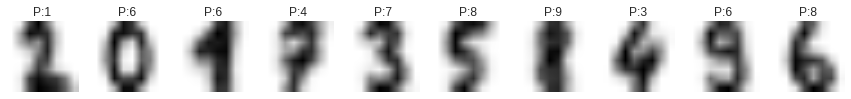

In [16]:
utiles.mostrar_imagenes(est.cluster_centers_,prediccion=clusters)

#### Agrupacion
Como se ha observado, el centro de cada clusters parece correcto: cada uno de ellos se asemeja a un numero. Ahora vamos a ver si realmente lo que se muestra son los numeros que tienen a su alrededor

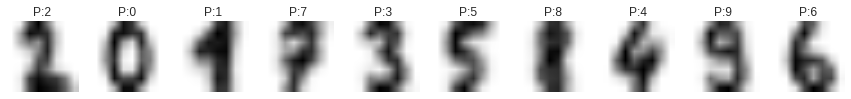

In [17]:
from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
prediccion_por_cluster=[]
for i in range(10):
    mask = (clusters == i)
    numero=mode(digits.target[mask])[0]
    prediccion_por_cluster.append(numero[0])
    labels[mask] = numero
    
utiles.mostrar_imagenes(est.cluster_centers_,prediccion=prediccion_por_cluster)

<a id="seccion5"></a>
### Reduccion dimensional
La tecnica de reduccion dimensional nos ayudan a explorar los datos con gran cantidad de variables
- Ayudar a dibujar el problema
- Reducir las variables de entrada para un algoritmo, evitando sobreajuste, por ejemplo en los arboles de decisiones
- Reducen la cantidad de datos a guardar

#### Entrenamiento

In [18]:
from sklearn.decomposition import PCA

numero_de_variables=2
X = PCA(numero_de_variables).fit_transform(digits.data)

In [19]:
datos=pd.DataFrame(data={'variable1':X[:, 0],'variable2':X[:, 1],'target':digits.target,'output':labels})
datos.head()

,output,target,variable1,variable2
0,0,0,1.259466,-21.274883
1,8,1,-7.957611,20.768699
2,8,2,-6.991923,9.955986
3,3,3,15.906105,-3.332464
4,4,4,-23.306867,-4.269061


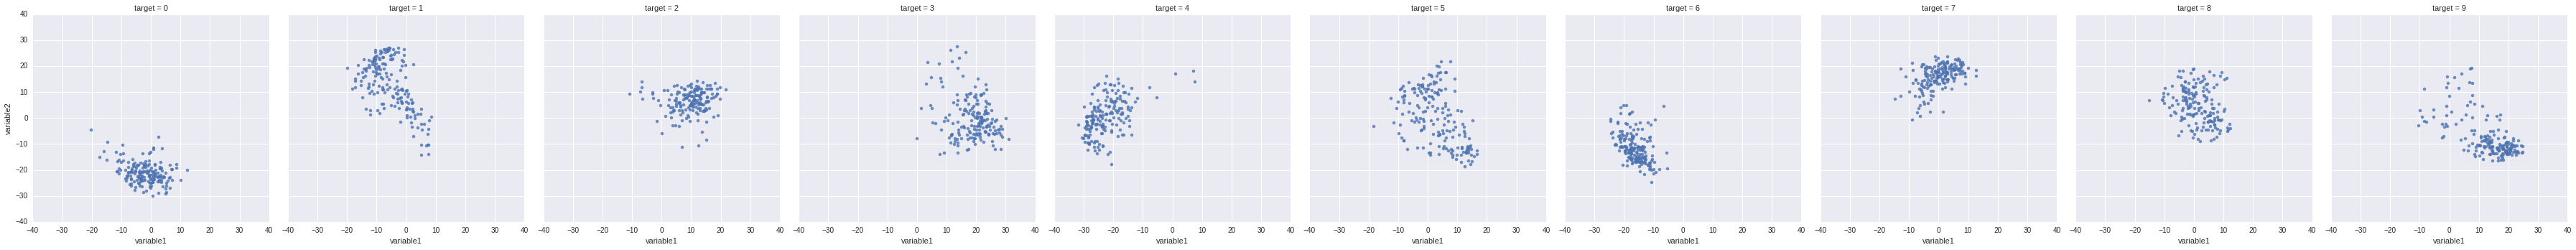

In [20]:
sns.lmplot('variable1', 'variable2', 
           data=datos, col='target',
           fit_reg=False )

<a id="seccion6"></a>
### Conclusion
- **Regresion**: Generar prediciones continuas (Sistema supervisado)
- **Clasificacion**: Determinar el grupo de cada muestra (Sistema supervisado)
- **Clustering**: Identificar grupos o estructuras ocultas (Sistema sin supervisar)
- **Reduccion dimensional**: Herramienta de tratamiento de datos

